## 1.python_share 的数据分析部分
## 2.10 minutes to pandas(anaconda)
## 3.datagrip 及 sql
## 4.禧云EDA案例

In [4]:
import numpy as np
import pandas as pd
import pandas_profiling
from data_parser import SqlServer_Parser
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

In [55]:
top200_supplier = list(pd.read_csv('供应商金额排序.csv', encoding='GBK')['supplierName'].values[:200])

In [21]:
top70_customer = list(pd.read_csv('客户金额排序.csv', encoding='GBK')['customerName'].values[:70])

In [5]:
the_parser = SqlServer_Parser()

In [6]:
the_table6 = the_parser.read_table6()
the_table7 = pd.read_pickle('the_table7.pkl')

In [7]:
the_table67 = pd.merge(the_table7, the_table6, on='billNo')
the_table67['createTime'] = the_table67['createTime'].map(lambda x: x.strftime('%Y-%m'))
the_table67['materialNumber_short'] = the_table67['materialNumber'].map(lambda x: x[:10])

In [9]:
the_table67 = the_table67[['supplierName', 'materialNumber_short', 'createTime', 'allAmount']]

In [10]:
the_table67.head()

,supplierName,materialNumber_short,createTime,allAmount
0,师宗县戚氏老字号米线作坊,XDC.F01.05,2019-06,588.3
1,师宗县老字号豆腐加工坊,XDC.F08.01,2019-06,120.0
2,师宗县老字号豆腐加工坊,XDC.F08.01,2019-06,60.0
3,师宗县倪志诚鲜肉摊点,XDC.F04.01,2019-06,540.0
4,师宗县嗨跑腿餐饮配送服务中心（曹云花）,XDC.F05.01,2019-06,562.8


In [25]:
sku_time_money_supplier = the_table67.groupby(['materialNumber_short', 'createTime']).sum()['allAmount']
sku_time_money_supplier.head(10)

materialNumber_short  createTime
DC.D01.01.            2018-11          168.00
DC.D01.04.            2018-11          260.00
DC.D01.06.            2018-11           25.20
DC.D01.08.            2018-10            0.80
                      2018-11         2985.40
                      2019-05       249916.38
DC.D03.01.            2018-11           70.00
DC.D04.01.            2018-11          700.00
DC.D04.02.            2018-11          102.00
DC.D04.03.            2018-11          980.00
Name: allAmount, dtype: float64

In [18]:
the_table16 = the_parser.read_table16()
the_table17 = pd.read_pickle('the_table17.pkl')

In [19]:
the_table1617 = pd.merge(the_table17, the_table16, on='billNo')
the_table1617['createTime'] = the_table1617['createTime'].map(lambda x: x.strftime('%Y-%m'))
the_table1617['materialNumber_short'] = the_table1617['materialNumber'].map(lambda x: x[:10])

In [22]:
the_table1617 = the_table1617[['customerName', 'materialNumber_short', 'createTime', 'allAmount']]

In [23]:
the_table1617.head()

,customerName,materialNumber_short,createTime,allAmount
0,南京市东南大学附属中大医院,XDC.F01.02,2019-06,10350.00
1,南京市东南大学附属中大医院,XDC.F01.03,2019-06,490.00
2,南京市东南大学附属中大医院,XDC.F02.01,2019-06,4581.60
3,南京市东南大学附属中大医院,XDC.F01.03,2019-06,732.06
4,南京市东南大学附属中大医院,XDC.F01.03,2019-06,662.50


In [27]:
sku_time_money_customer = the_table1617.groupby(['materialNumber_short', 'createTime']).sum()['allAmount']

In [28]:
sku_time_money_supplier.head(10)

materialNumber_short  createTime
DC.D01.01.            2018-11          168.00
DC.D01.04.            2018-11          260.00
DC.D01.06.            2018-11           25.20
DC.D01.08.            2018-10            0.80
                      2018-11         2985.40
                      2019-05       249916.38
DC.D03.01.            2018-11           70.00
DC.D04.01.            2018-11          700.00
DC.D04.02.            2018-11          102.00
DC.D04.03.            2018-11          980.00
Name: allAmount, dtype: float64

In [29]:
sku_time_money_customer.head(10)

materialNumber_short  createTime
DC.D01.01.            2018-11          120.00
DC.D01.04.            2018-11          260.00
DC.D01.06.            2018-11           18.00
DC.D01.08.            2018-10            0.80
                      2018-11         2173.80
                      2019-05       251603.91
DC.D03.01.            2018-11           50.00
DC.D04.01.            2018-11          500.00
DC.D04.02.            2018-11          102.00
DC.D04.03.            2018-11          980.00
Name: allAmount, dtype: float64

In [37]:
sku_time_money_vs = pd.merge(sku_time_money_supplier, sku_time_money_customer, on=['materialNumber_short', 'createTime'])

In [39]:
sku_time_money_vs['allAmount_y'] = -sku_time_money_vs['allAmount_y']

In [42]:
sku_time_money_vs.to_csv('sku_time_money_vs.csv', encoding='GBK')

In [4]:
the_table16 = the_parser.read_table16()

In [7]:
the_table17 = the_parser.read_table17()

In [9]:
the_table16.head(2)

,billNo,createTime,billAllAmount,customerName
0,XSDD312119,2019-06-01,17673.16,南京市东南大学附属中大医院
1,XSDD312120,2019-06-01,91.00,南京市东南大学附属中大医院


In [10]:
the_table17.head(2)

,billNo,materialNumber,allAmount
0,XSDD312119,XDC.F01.02.0052,10350.0
1,XSDD312119,XDC.F01.03.0071,490.0


In [32]:
the_table1617 = pd.merge(the_table17, the_table16, on='billNo')

In [33]:
the_table1617.head()

,billNo,materialNumber,allAmount,createTime,billAllAmount,customerName
0,XSDD312119,XDC.F01.02.0052,10350.00,2019-06-01,17673.16,南京市东南大学附属中大医院
1,XSDD312119,XDC.F01.03.0071,490.00,2019-06-01,17673.16,南京市东南大学附属中大医院
2,XSDD312119,XDC.F02.01.0178,4581.60,2019-06-01,17673.16,南京市东南大学附属中大医院
3,XSDD312119,XDC.F01.03.0068,732.06,2019-06-01,17673.16,南京市东南大学附属中大医院
4,XSDD312119,XDC.F01.03.0077,662.50,2019-06-01,17673.16,南京市东南大学附属中大医院


In [39]:
the_table1617['createTime'] = the_table1617['createTime'].map(lambda x: x.strftime('%Y-%m'))

In [40]:
the_table1617['materialNumber_short'] = the_table1617['materialNumber'].map(lambda x: x[:10])

In [41]:
the_table1617 = the_table1617[['customerName', 'materialNumber_short', 'createTime', 'allAmount']]

In [42]:
the_table1617 = the_table1617[the_table1617['customerName'].isin(top70_customer)]

In [43]:
grouped = the_table1617.groupby(['customerName', 'materialNumber_short', 'createTime']).sum()

In [45]:
grouped.to_csv('top70客户不同品种详细发生金额_月.csv', encoding='GBK')

In [46]:
the_table6 = the_parser.read_table6()

In [47]:
the_table7 = pd.read_pickle('the_table7.pkl')

In [48]:
the_table6.head(2)

,billNo,createTime,billAllAmount,supplierName,consignorName,consignorPhone,consignAddress,CreatedAt,UpdatedAt,_Locked,_Identify,operatorName,operatorRole,billDetails,supplierNumber
0,CGDD308595,2019-06-01,588.3,师宗县戚氏老字号米线作坊,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,1,杨勇,采购,None,None
1,CGDD308596,2019-06-01,180.0,师宗县老字号豆腐加工坊,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,2,杨勇,采购,None,None


In [49]:
the_table7.head(2)

,billNo,materialName,materialNumber,allAmount
0,CGDD308595,细米线|散装|称重,XDC.F01.05.0002,588.3
1,CGDD308596,豆干（白干）|散装|称重,XDC.F08.01.0053,120.0


In [50]:
the_table67 = pd.merge(the_table7, the_table6, on='billNo')

In [51]:
the_table67['createTime'] = the_table67['createTime'].map(lambda x: x.strftime('%Y-%m'))

In [52]:
the_table67['materialNumber_short'] = the_table67['materialNumber'].map(lambda x: x[:10])

In [53]:
the_table67 = the_table67[['supplierName', 'materialNumber_short', 'createTime', 'allAmount']]

In [56]:
the_table67 = the_table67[the_table67['supplierName'].isin(top200_supplier)]

In [57]:
len(the_table67)

1200044

In [58]:
the_table67.head(5)

,supplierName,materialNumber_short,createTime,allAmount
192,高阳县邦乐菜店,XDC.F05.01,2019-06,150.0
193,高阳县邦乐菜店,XDC.F05.01,2019-06,50.0
194,高阳县邦乐菜店,XDC.F05.01,2019-06,72.0
195,高阳县邦乐菜店,XDC.F05.01,2019-06,27.0
196,高阳县邦乐菜店,XDC.F05.01,2019-06,30.0


In [59]:
grouped = the_table67.groupby(['supplierName', 'materialNumber_short', 'createTime']).sum()

In [60]:
grouped.head(3)

allAmount
supplierName materialNumber_short createTime           
万少清          XDC.F05.01           2019-04     5000000.0
上海强瓴食品销售有限公司 XDC.F01.03           2019-04        1700.0
                                  2019-05        1145.0

In [61]:
grouped.to_csv('top200供应商不同品种详细发生金额_月.csv', encoding='GBK')

In [4]:
the_table16 = the_parser.read_table16()

In [13]:
the_table16.createTime.min()

Timestamp('2018-06-01 00:00:00')

In [12]:
the_table16.createTime.max()

Timestamp('2019-06-01 00:00:00')

In [5]:
the_table16.head()

,createTime,billAllAmount,customerName
0,2019-06-01,17673.16,南京市东南大学附属中大医院
1,2019-06-01,91.00,南京市东南大学附属中大医院
2,2019-06-01,228.40,南京市东南大学附属中大医院
3,2019-06-01,1207.38,南京市东南大学附属中大医院
4,2019-06-01,2491.38,南京市东南大学附属中大医院


In [15]:
the_table16.billAllAmount.mean()

4925.5134925577095

In [22]:
a_ = the_table16.groupby('customerName').sum()['billAllAmount'].sort_values(ascending=False)
a_ = pd.DataFrame(a_)
a_['percent'] = (a_['billAllAmount'] / 1385862178.3200002) * 100
a_[:5]

,billAllAmount,percent
customerName,,
大连东霖食品股份有限公司,4.372306e+08,31.549358
苏州大学附属第一医院,6.418817e+07,4.631642
信良记食品科技（北京）有限公司,4.919903e+07,3.550067
广东乐禾食品股份有限公司,2.319696e+07,1.673829
粤旺农业集团有限公司,1.937550e+07,1.398083


In [34]:
len(a_)

677

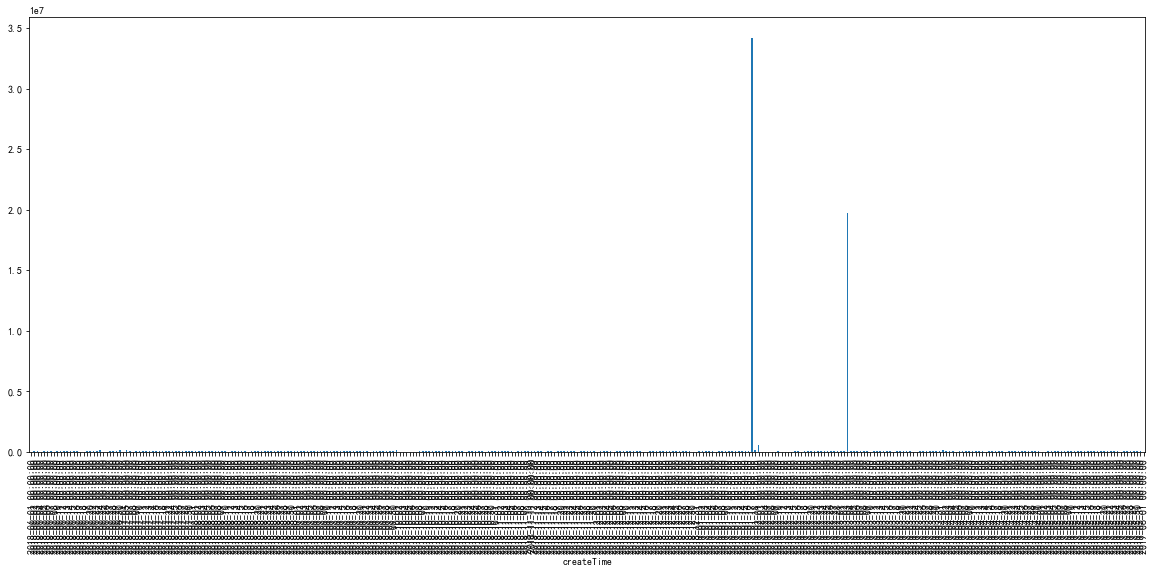

In [42]:
the_table16[the_table16['customerName']=='苏州大学附属第一医院'].groupby('createTime').sum()['billAllAmount'].plot(figsize=(20, 8), kind='bar')

In [43]:
b_ = the_table16[the_table16['customerName']=='苏州大学附属第一医院'].groupby('createTime').sum()['billAllAmount']

In [46]:
b_.head()

createTime
2018-06-01     1989.30
2018-06-02    86818.45
2018-06-03    20880.50
2018-06-04     6546.68
2018-06-05    20200.03
Name: billAllAmount, dtype: float64

In [48]:
b_[b_ > 15000000]

createTime
2019-01-17    34229072.61
2019-03-03    19714042.83
Name: billAllAmount, dtype: float64

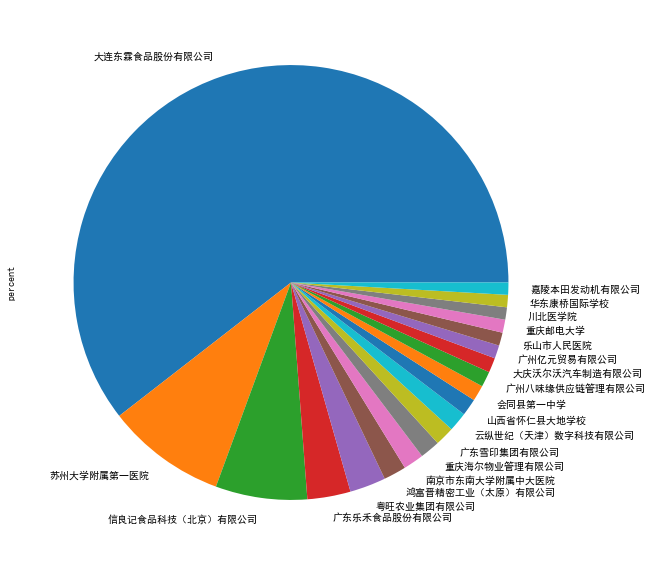

In [26]:
a_['percent'][:20].plot.pie(figsize=(10, 10))

In [56]:
customer_list = list(a_[:70].index)

In [55]:
the_table16.head()

,createTime,billAllAmount,customerName
0,2019-06-01,17673.16,南京市东南大学附属中大医院
1,2019-06-01,91.00,南京市东南大学附属中大医院
2,2019-06-01,228.40,南京市东南大学附属中大医院
3,2019-06-01,1207.38,南京市东南大学附属中大医院
4,2019-06-01,2491.38,南京市东南大学附属中大医院


In [60]:
c_ = the_table16[the_table16['customerName'].isin(customer_list)].groupby(['customerName', 'createTime']).count()['billAllAmount']
c_.head()

customerName   createTime
中国人民解放军昆明陆军学院  2018-06-01    10
               2018-06-02     3
               2018-06-03     6
               2018-06-04     9
               2018-06-05     4
Name: billAllAmount, dtype: int64

In [61]:
from collections import defaultdict
frep_dict = defaultdict(int)
for c_name in c_.index.get_level_values('customerName'):
    # print(idate)
    frep_dict[c_name] += 1
    # complex_process(df.ix[idate], idate)

In [62]:
c__ = pd.DataFrame(frep_dict.items())
c__.columns = ['company_name', 'freq']

In [63]:
c__ = c__.set_index('company_name')

In [64]:
c__.sort_values('freq', ascending=False).to_csv('top客户销售频次排序.csv', encoding='GBK')

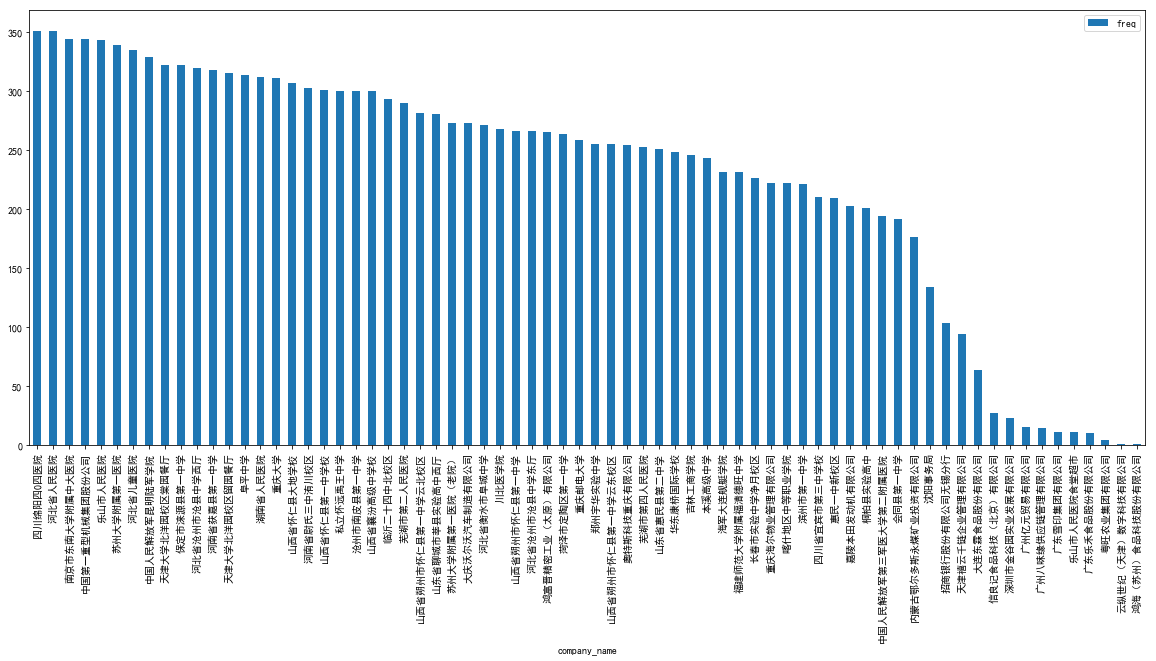

In [65]:
c__.sort_values('freq', ascending=False).plot(figsize=(20, 8), kind='bar')

In [41]:
the_table6 = the_parser.read_table6()

In [42]:
the_table6.head()

,billNo,createTime,billAllAmount,supplierName,consignorName,consignorPhone,consignAddress,CreatedAt,UpdatedAt,_Locked,_Identify,operatorName,operatorRole,billDetails,supplierNumber
0,CGDD308595,2019-06-01,588.3,师宗县戚氏老字号米线作坊,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,1,杨勇,采购,None,None
1,CGDD308596,2019-06-01,180.0,师宗县老字号豆腐加工坊,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,2,杨勇,采购,None,None
2,CGDD308597,2019-06-01,540.0,师宗县倪志诚鲜肉摊点,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,3,杨勇,采购,None,None
3,CGDD308598,2019-06-01,562.8,师宗县嗨跑腿餐饮配送服务中心（曹云花）,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,4,杨勇,采购,None,None
4,CGDD308599,2019-06-01,50.0,师宗县农贸市场蔬菜东存摊点,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,5,杨勇,采购,None,None


,billNo,createTime,supplierName
0,CGDD308595,2019-06-01,师宗县戚氏老字号米线作坊
1,CGDD308596,2019-06-01,师宗县老字号豆腐加工坊


In [3]:
the_table7 = the_parser.read_table7()

In [9]:
the_table7.head()

,billNo,materialName,materialNumber,allAmount,materialNumber_short
0,CGDD308595,细米线|散装|称重,XDC.F01.05.0002,588.3,XDC.F01.05
1,CGDD308596,豆干（白干）|散装|称重,XDC.F08.01.0053,120.0,XDC.F08.01
2,CGDD308596,卤水豆腐|散装|称重,XDC.F08.01.0066,60.0,XDC.F08.01
3,CGDD308597,去皮前腿肉|散装|称重,XDC.F04.01.0166,540.0,XDC.F04.01
4,CGDD308598,大土豆|大号|散装|称重,XDC.F05.01.0008,562.8,XDC.F05.01


In [22]:
the_table7['materialNumber_short'] = the_table7['materialNumber'].map(lambda x: x[:10])

In [23]:
d = the_table7.groupby('materialNumber_short').sum()['allAmount'].sort_values(ascending=False)

In [24]:
len(d)

129

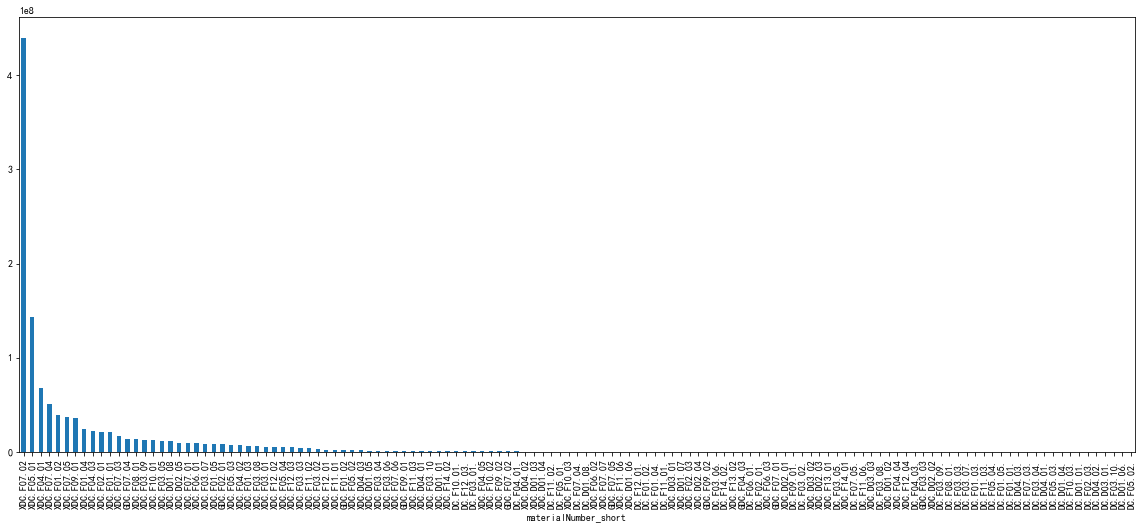

In [25]:
d.plot(figsize=(20, 8), kind='bar')

In [26]:
d[:7]

materialNumber_short
XDC.F07.02    4.396748e+08
XDC.F05.01    1.436425e+08
XDC.F04.01    6.806951e+07
XDC.F07.04    5.094196e+07
XDC.F01.02    3.923883e+07
XDC.F07.05    3.713258e+07
XDC.F09.01    3.555649e+07
Name: allAmount, dtype: float64

In [63]:
e = the_table7[the_table7['materialNumber_short']=='XDC.F07.02']
e.head()

,billNo,materialName,materialNumber,allAmount,materialNumber_short
732,CGDD308692,鲶鱼|散装|称重,XDC.F07.02.0066,111.8,XDC.F07.02
1090,CGDD308727,带鱼|散装|称重,XDC.F07.02.0068,85.0,XDC.F07.02
1091,CGDD308727,鲤鱼|散装|称重,XDC.F07.02.0065,42.0,XDC.F07.02
1579,CGDD308784,黄花鱼|散装|称重,XDC.F07.02.0070,360.0,XDC.F07.02
1617,CGDD308787,鲤鱼|散装|称重,XDC.F07.02.0065,144.2,XDC.F07.02


In [64]:
f = the_table6[['billNo', 'createTime', 'supplierName']]
f.head()

,billNo,createTime,supplierName
0,CGDD308595,2019-06-01,师宗县戚氏老字号米线作坊
1,CGDD308596,2019-06-01,师宗县老字号豆腐加工坊
2,CGDD308597,2019-06-01,师宗县倪志诚鲜肉摊点
3,CGDD308598,2019-06-01,师宗县嗨跑腿餐饮配送服务中心（曹云花）
4,CGDD308599,2019-06-01,师宗县农贸市场蔬菜东存摊点


In [65]:
g = pd.merge(e, f, on='billNo')
g.head()

,billNo,materialName,materialNumber,allAmount,materialNumber_short,createTime,supplierName
0,CGDD308692,鲶鱼|散装|称重,XDC.F07.02.0066,111.8,XDC.F07.02,2019-06-01,郑州宾之硕商贸有限公司
1,CGDD308727,带鱼|散装|称重,XDC.F07.02.0068,85.0,XDC.F07.02,2019-06-01,高阳县马辉粮油经销部
2,CGDD308727,鲤鱼|散装|称重,XDC.F07.02.0065,42.0,XDC.F07.02,2019-06-01,高阳县马辉粮油经销部
3,CGDD308784,黄花鱼|散装|称重,XDC.F07.02.0070,360.0,XDC.F07.02,2019-06-01,天津市扬名信诚商贸有限公司
4,CGDD308787,鲤鱼|散装|称重,XDC.F07.02.0065,144.2,XDC.F07.02,2019-06-01,阜平县金莲批发部


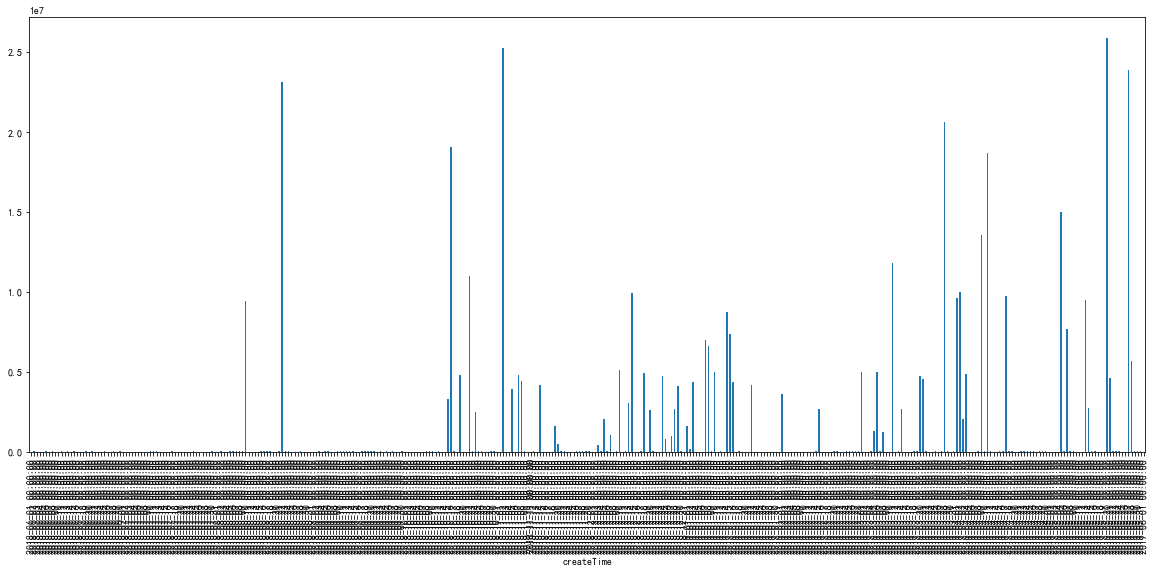

In [66]:
g.groupby('createTime').sum()['allAmount'].plot(figsize=(20, 8), kind='bar')

In [17]:
# 2018年6月1日~2019年6月1日，共366天
# 共27万笔订单
# 每单均价4200
# 期间供应商共1911户，供应频次最频繁的为'襄汾县聚鸿粮油配送中心' 供应金额

In [ ]:
# 以天为单位，统计每家公司的采购间隔序列

In [78]:
len(the_table6.groupby('supplierName').sum()['billAllAmount'].sort_values(ascending=False))

1911

In [109]:
b_ = the_table6.groupby('supplierName').sum()['billAllAmount'].sort_values(ascending=False)
b_ = pd.DataFrame(b_)
b_.head()

,billAllAmount
supplierName,
大连深海渔宴食品有限公司,24593324.00
大连大洋渔庆水产有限公司,24517825.60
大连卡拉玛食品有限公司,24487198.80
大连百洲贸易有限公司,19371419.40
中大信联（大连）信息科技有限公司,19261381.96


In [110]:
b_['billAllAmount_percent'] = b_['billAllAmount'] / 1138678000 * 100

In [124]:
b_.head(200)['billAllAmount_percent'].sum()

70.69238505530097

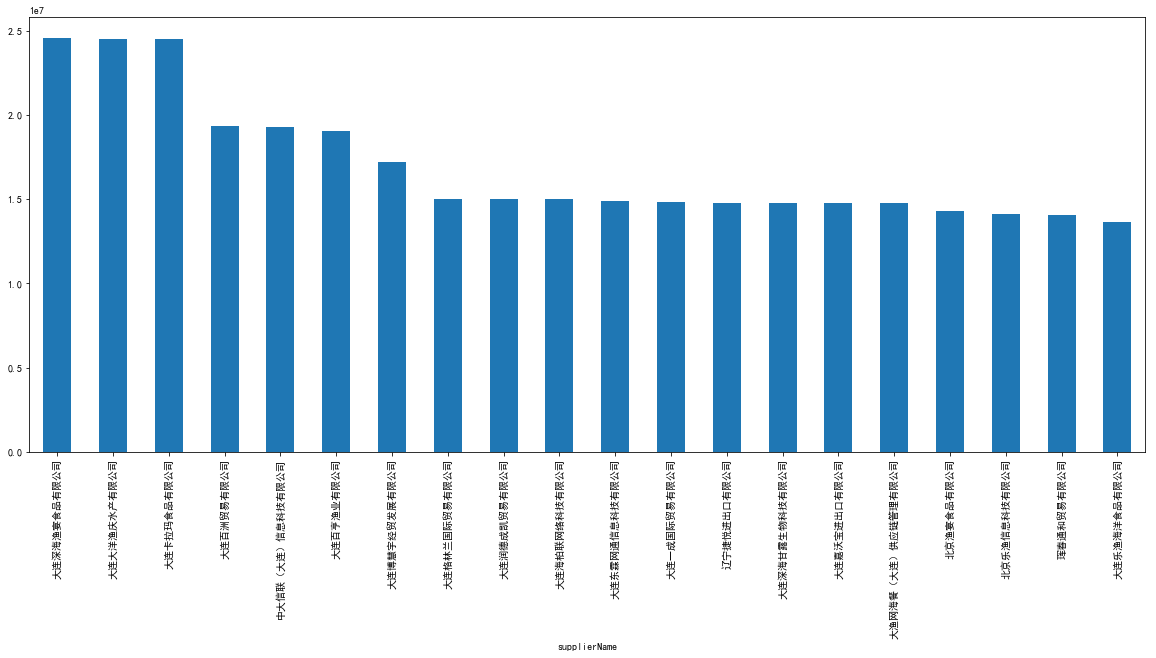

In [120]:
b_.head(20)['billAllAmount'].plot(figsize=(20, 8), kind='bar')

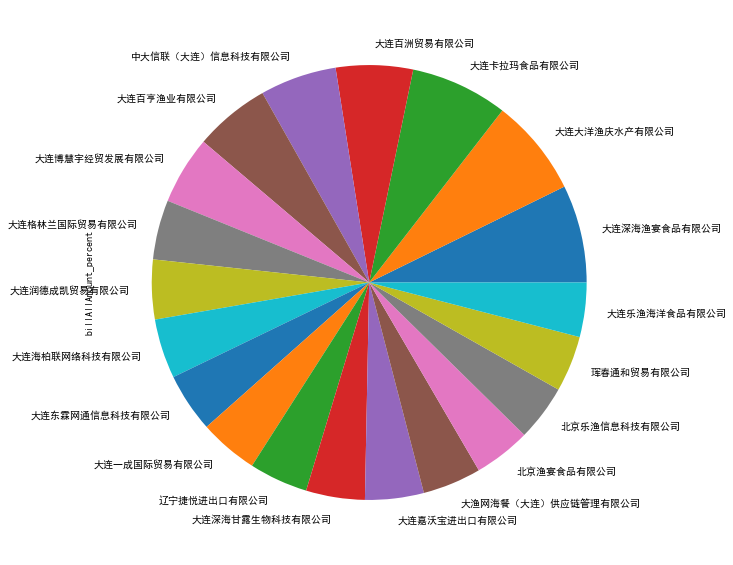

In [115]:
b_['billAllAmount_percent'][:20].plot.pie(figsize=(10, 10))

In [151]:
b_['billAllAmount_percent'][:20]

supplierName
大连深海渔宴食品有限公司          2.159814
大连大洋渔庆水产有限公司          2.153183
大连卡拉玛食品有限公司           2.150494
大连百洲贸易有限公司            1.701220
中大信联（大连）信息科技有限公司      1.691557
大连百亨渔业有限公司            1.671985
大连博慧宇经贸发展有限公司         1.508712
大连格林兰国际贸易有限公司         1.316917
大连润德成凯贸易有限公司          1.316748
大连海柏联网络科技有限公司         1.315863
大连东霖网通信息科技有限公司        1.305564
大连一成国际贸易有限公司          1.304284
辽宁捷悦进出口有限公司           1.299120
大连深海甘露生物科技有限公司        1.298748
大连嘉沃宝进出口有限公司          1.296483
大渔网海餐（大连）供应链管理有限公司    1.295966
北京渔宴食品有限公司            1.256085
北京乐渔信息科技有限公司          1.237943
珲春通和贸易有限公司            1.235686
大连乐渔海洋食品有限公司          1.199801
Name: billAllAmount_percent, dtype: float64

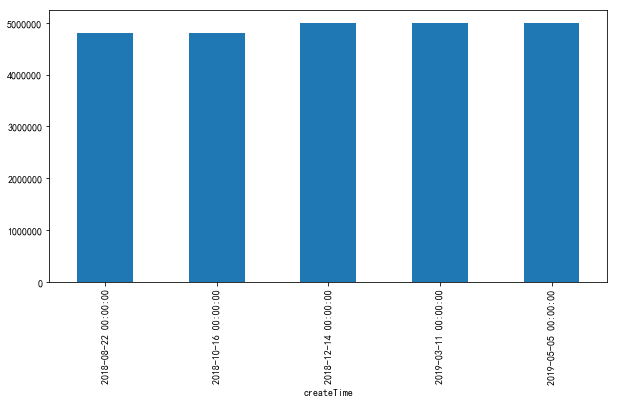

In [152]:
the_table6[the_table6['supplierName']=='大连深海渔宴食品有限公司'].groupby('createTime').sum()['billAllAmount'].plot(figsize=(10, 5), kind='bar')

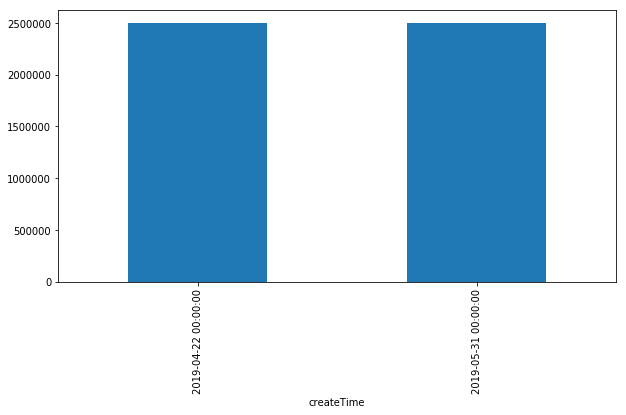

In [93]:
the_table6[the_table6['supplierName']=='广州市绿田农业有限公司'].groupby('createTime').sum()['billAllAmount'].plot(figsize=(10, 5), kind='bar')

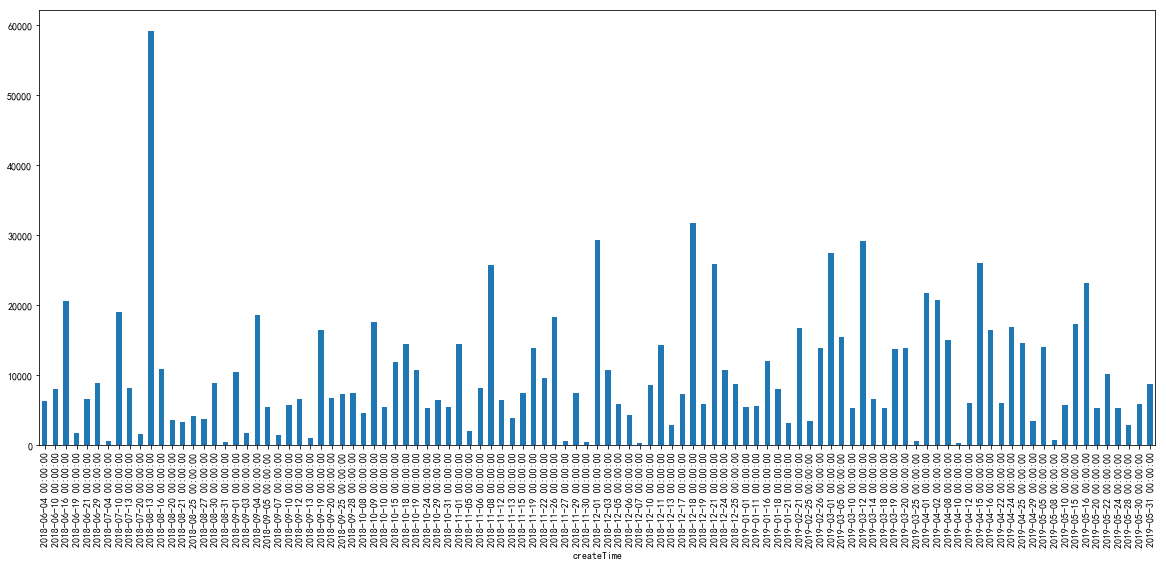

In [218]:
the_table6[the_table6['supplierName']=='宜宾市天胜粮油有限公司'].groupby('createTime').sum()['billAllAmount'].plot(figsize=(20, 8), kind='bar')

In [219]:
the_table6[the_table6['supplierName']=='宜宾市天胜粮油有限公司'].groupby('createTime').sum()['billAllAmount'].describe()

count      105.000000
mean     10064.999810
std       8818.381432
min        170.020000
25%       5247.000000
50%       7350.000000
75%      14260.850000
max      59180.390000
Name: billAllAmount, dtype: float64

In [157]:
len(list(b_['billAllAmount_percent'][:200].index))

200

In [155]:
the_table6.head()

,billNo,createTime,billAllAmount,supplierName,consignorName,consignorPhone,consignAddress,CreatedAt,UpdatedAt,_Locked,_Identify,operatorName,operatorRole,billDetails,supplierNumber
0,CGDD308595,2019-06-01,588.3,师宗县戚氏老字号米线作坊,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,1,杨勇,采购,None,None
1,CGDD308596,2019-06-01,180.0,师宗县老字号豆腐加工坊,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,2,杨勇,采购,None,None
2,CGDD308597,2019-06-01,540.0,师宗县倪志诚鲜肉摊点,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,3,杨勇,采购,None,None
3,CGDD308598,2019-06-01,562.8,师宗县嗨跑腿餐饮配送服务中心（曹云花）,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,4,杨勇,采购,None,None
4,CGDD308599,2019-06-01,50.0,师宗县农贸市场蔬菜东存摊点,,,,2019-09-19 12:52:26.6270000,2019-09-19 12:52:26.6270000,None,5,杨勇,采购,None,None


In [173]:
c_ = the_table6[the_table6['supplierName'].isin(list(b_['billAllAmount_percent'][:200].index))].groupby(['supplierName', 'createTime']).count()['billNo']
c_.head()

supplierName  createTime
万少清           2019-04-22    1
上海强瓴食品销售有限公司  2019-04-12    1
              2019-04-18    4
              2019-04-22    2
              2019-04-26    1
Name: billNo, dtype: int64

In [191]:
from collections import defaultdict
frep_dict = defaultdict(int)
for c_name in c_.index.get_level_values('supplierName'):
    # print(idate)
    frep_dict[c_name] += 1
    # complex_process(df.ix[idate], idate)

In [210]:
c__ = pd.DataFrame(frep_dict.items())
c__.columns = ['company_name', 'freq']

In [211]:
c__.head()

,company_name,freq
0,万少清,1
1,上海强瓴食品销售有限公司,21
2,中大信联（大连）信息科技有限公司,7
3,临沂商城旭锦冷冻食品销售中心,287
4,临沂晨旭食品有限公司,320


In [213]:
c__ = c__.set_index('company_name')

In [215]:
c__.sort_values('freq', ascending=False).to_csv('top200供应商采购频次排序.csv', encoding='GBK')

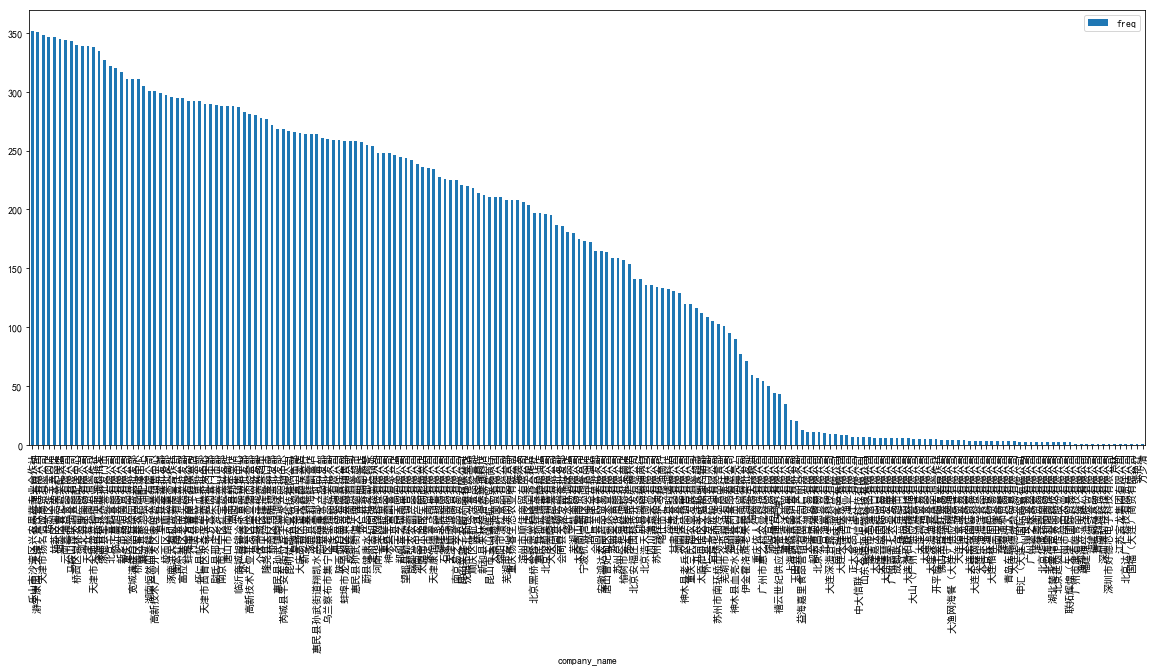

In [214]:
c__.sort_values('freq', ascending=False).plot(figsize=(20, 8), kind='bar')

In [28]:
the_table6.supplierName.value_counts().sort_values(ascending=False)[:5]

襄汾县聚鸿粮油配送中心         1674
北方水产肉食门市部           1562
瀞宇康园（天津）餐饮管理有限公司    1221
河北得康商贸有限公司          1192
涿鹿县奎利海鲜副食店          1124
Name: supplierName, dtype: int64

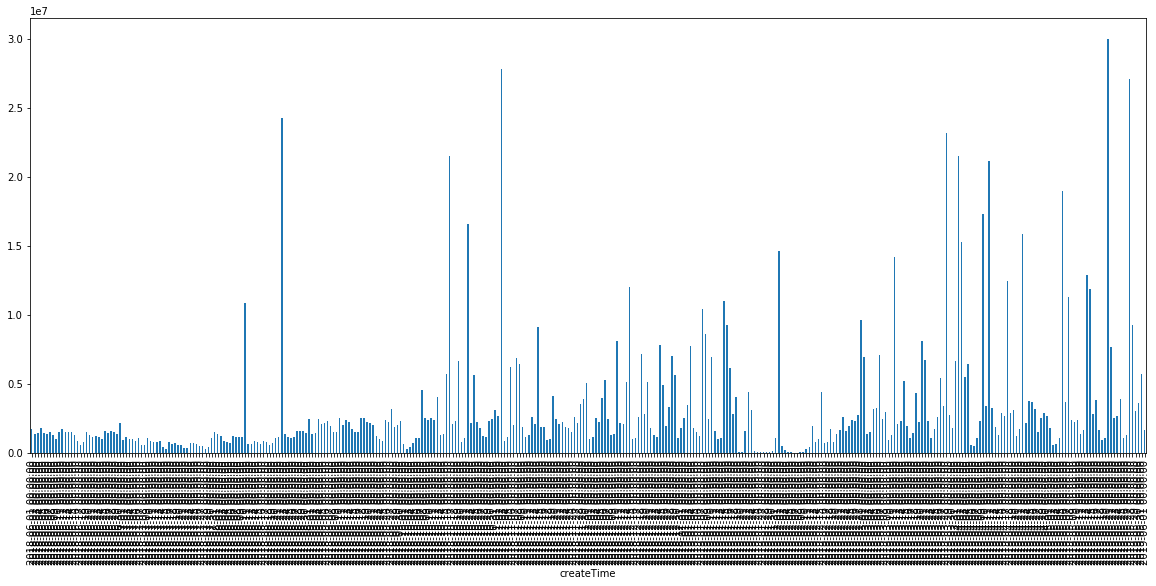

In [5]:
the_table6.groupby('createTime').sum()['billAllAmount'].plot(figsize=(20, 8), kind='bar')

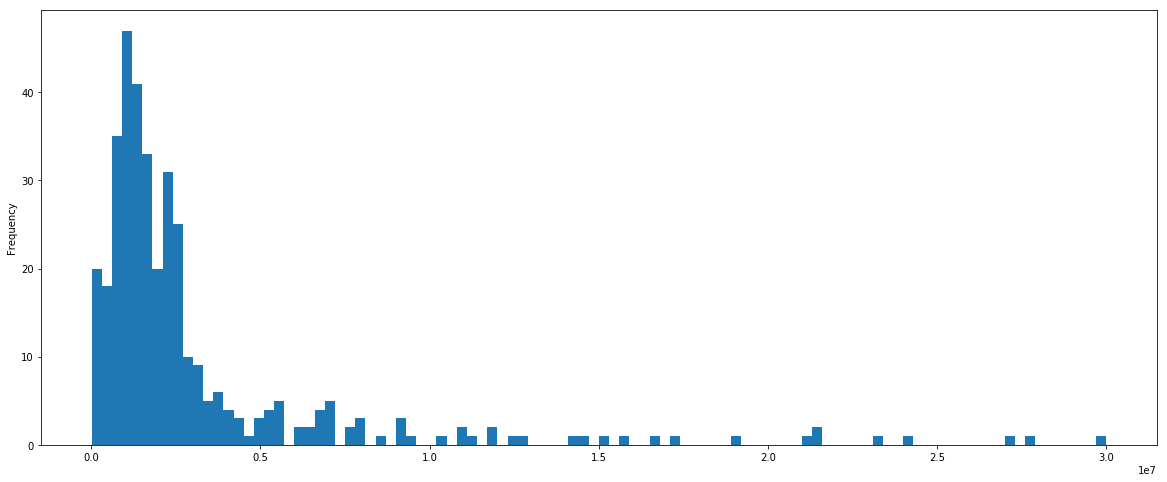

In [6]:
the_table6.groupby('createTime').sum()['billAllAmount'].plot(figsize=(20, 8), kind='hist', bins=100)

In [11]:
the_table6.groupby('createTime').sum()['billAllAmount'].quantile(0.9)

6922033.719999999

In [ ]:
the_table6.groupby('createTime').sum()['billAllAmount'].plot(figsize=(20, 8), kind='bar')

In [60]:
a_ = the_table6.groupby('createTime').sum()['billAllAmount']
a_.head()

createTime
2018-06-01    1681481.23
2018-06-02    1346747.97
2018-06-03    1389463.65
2018-06-04    1798761.40
2018-06-05    1450473.34
Name: billAllAmount, dtype: float64

In [39]:
a_.index

DatetimeIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
               '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
               '2018-06-09', '2018-06-10',
               ...
               '2019-05-23', '2019-05-24', '2019-05-25', '2019-05-26',
               '2019-05-27', '2019-05-28', '2019-05-29', '2019-05-30',
               '2019-05-31', '2019-06-01'],
              dtype='datetime64[ns]', name='createTime', length=366, freq=None)

In [36]:
a_.index[0].week

22

In [37]:
a_.index[-1].week

22

In [38]:
a_.index[-1]

Timestamp('2019-06-01 00:00:00')

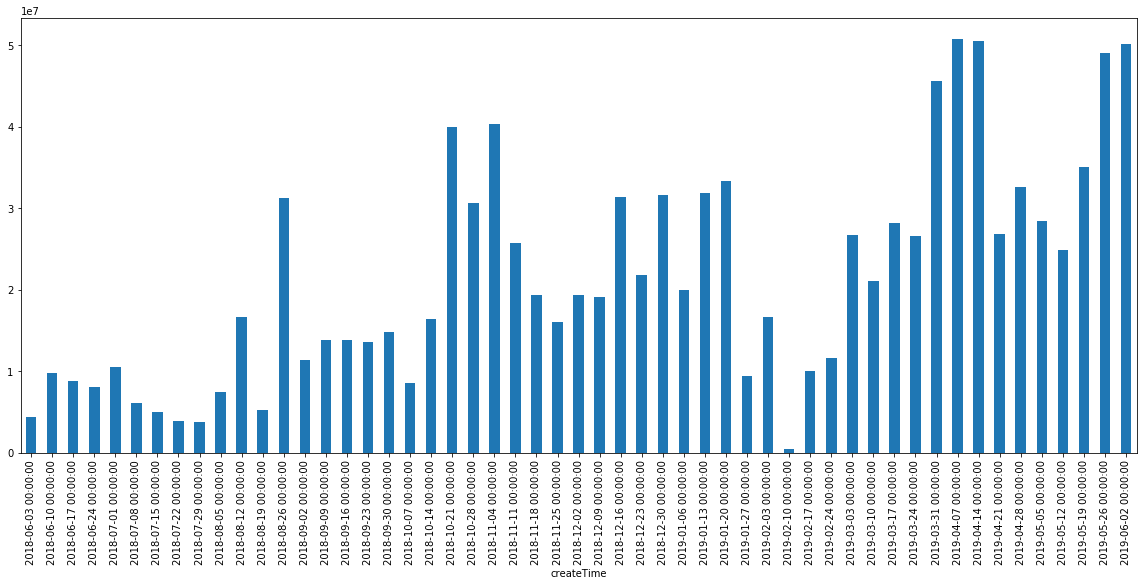

In [44]:
a_.resample('W').sum().plot(figsize=(20, 8), kind='bar')

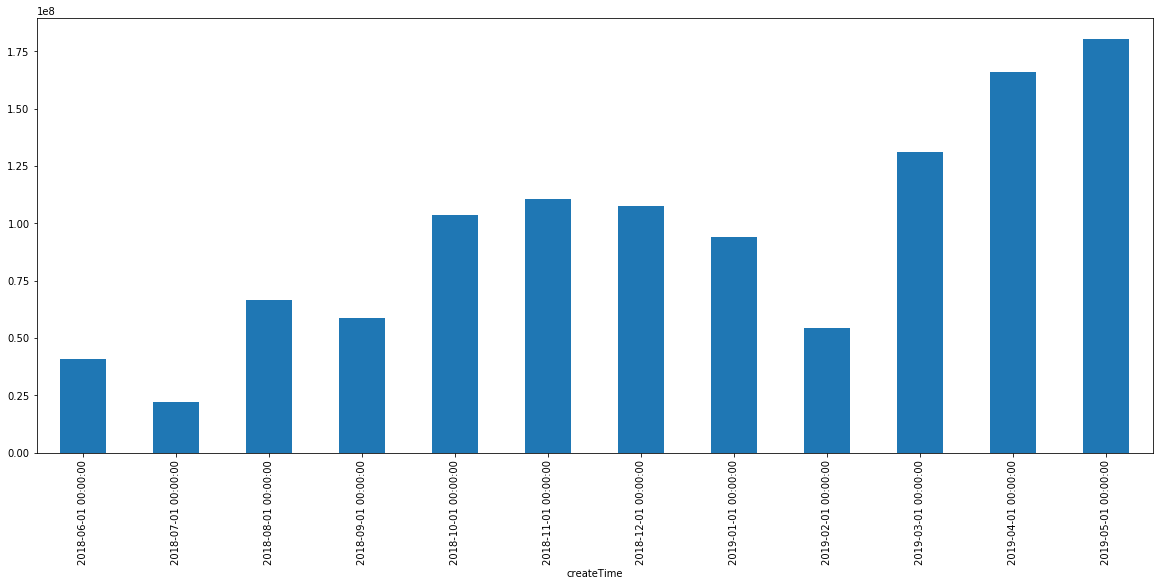

In [50]:
a_.resample('MS').sum()[:-1].plot(figsize=(20, 8), kind='bar')

In [64]:
a_ = pd.DataFrame(a_)
a_['createTime'] = a_.index

In [70]:
a_['the_day_of_week'] = a_['createTime'].map(lambda x: x.dayofweek)

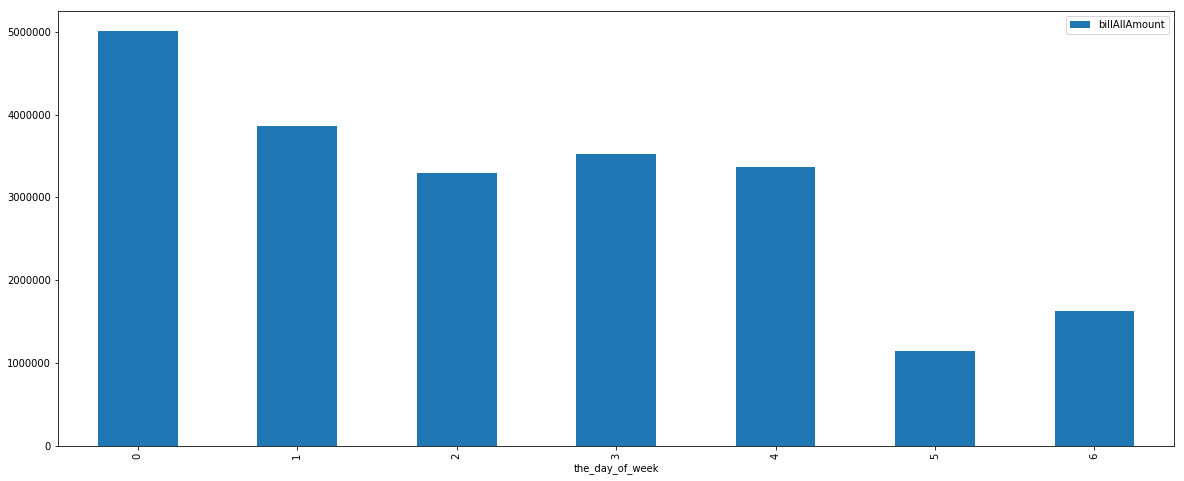

In [75]:
a_.groupby('the_day_of_week').mean().plot(figsize=(20, 8), kind='bar')

In [77]:
a_.index[-1].dayofweek

5

In [25]:
a_.mean()

3111141.848005466

In [29]:
a_[a_ > 5000000] = 0

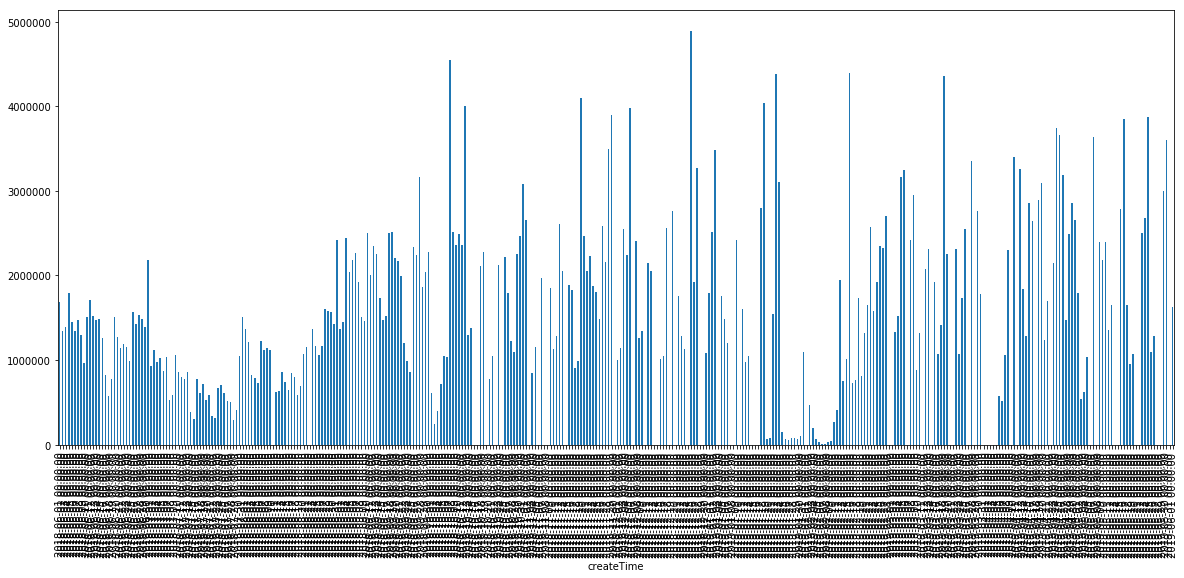

In [30]:
a_.plot(figsize=(20, 8), kind='bar')

In [ ]:
# 当日金额超过5000000万，当日为采购量异常日

In [45]:
createTime_group = the_table6.groupby('createTime').sum()['billAllAmount']

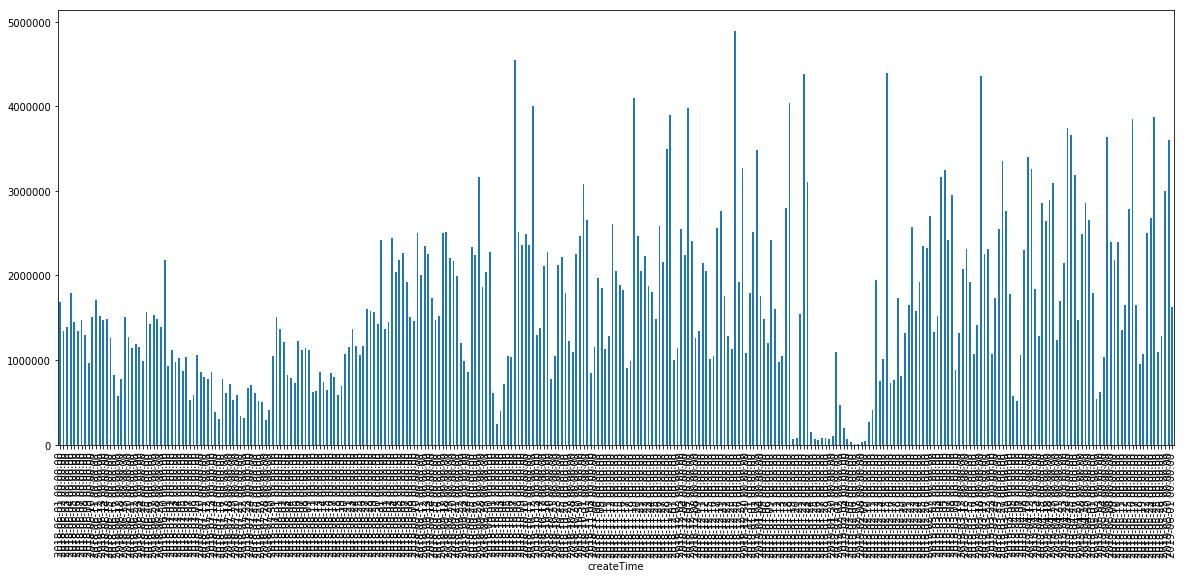

In [50]:
createTime_group[createTime_group < 5000000].plot(figsize=(20, 8), kind='bar')

In [ ]:
# the_table1 = the_parser.read_table1()
# the_table2 = the_parser.read_table2()

In [4]:
# the_table1_profiling = pandas_profiling.ProfileReport(the_table1)
# the_table1_profiling.to_file("./data/the_table1.html")

In [5]:
# the_table2_profiling = pandas_profiling.ProfileReport(the_table2)
# the_table2_profiling.to_file("./data/the_table2.html")